게임

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from google.colab import files
import scipy.stats as stats
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
%matplotlib inline
# 파일 업로드 - files.upload() -
# 파일 읽어오기 - 파일 전처리(EDA)
files.upload()
df = pd.read_csv('vgames2.csv')

df.drop(df.columns[0], axis = 1, inplace = True)
df.info()

df.dropna(inplace = True)
df.reset_index(drop=True, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [ ]:
# 결측치
for col in df.columns:
    asd = 'column {:<10}\t Percent of NaN value : {:.2f}%'.format(col, 100*(df[col].isnull().sum() / len(df[col])))
    print(asd)

column Name      	 Percent of NaN value : 0.00%
column Platform  	 Percent of NaN value : 0.00%
column Year      	 Percent of NaN value : 0.00%
column Genre     	 Percent of NaN value : 0.00%
column Publisher 	 Percent of NaN value : 0.00%
column NA_Sales  	 Percent of NaN value : 0.00%
column EU_Sales  	 Percent of NaN value : 0.00%
column JP_Sales  	 Percent of NaN value : 0.00%
column Other_Sales	 Percent of NaN value : 0.00%


In [ ]:
# k,m 문자열 처리
df['NA_Sales'] = df['NA_Sales'].replace({'K': '*0.001', 'M': ""}, regex=True).map(pd.eval)
df['EU_Sales'] = df['EU_Sales'].replace({'K': '*0.001', 'M': ""}, regex=True).map(pd.eval)
df['JP_Sales'] = df['JP_Sales'].replace({'K': '*0.001', 'M': ""}, regex=True).map(pd.eval)
df['Other_Sales'] = pd.to_numeric(df['Other_Sales'].replace({'K': '*0.001', 'M': ""}, regex=True).map(pd.eval))
df["총판매"] = df.NA_Sales + df.EU_Sales + df.JP_Sales + df.Other_Sales

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
 9   Total_Sales  16241 non-null  float64
 10  총판매          16241 non-null  float64
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [ ]:
locate_Genre_NA = df.groupby(['Genre'])['NA_Sales'].sum()
locate_Genre_EU = df.groupby(['Genre'])['EU_Sales'].sum()
locate_Genre_JP = df.groupby(['Genre'])['JP_Sales'].sum()
locate_Genre_Other = df.groupby(['Genre'])['Other_Sales'].sum()
locate_Genre = pd.DataFrame()
locate_Genre = locate_Genre.append(locate_Genre_NA)
locate_Genre = locate_Genre.append(locate_Genre_EU)
locate_Genre = locate_Genre.append(locate_Genre_JP)
locate_Genre = locate_Genre.append(locate_Genre_Other)
locate_Genre

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
NA_Sales,858.75,101.79,220.35,394.73,445.38,121.58,354.70,318.76,574.48,181.43,667.26,67.83
EU_Sales,513.64,63.66,99.90,208.15,200.63,50.47,235.02,183.09,310.23,112.99,370.97,44.82
JP_Sales,156.60,51.87,87.14,104.18,130.53,56.24,56.32,342.93,38.18,63.54,134.76,49.10
Other_Sales,183.99,16.70,36.15,72.64,51.45,12.44,76.51,56.73,101.86,31.32,132.35,11.23


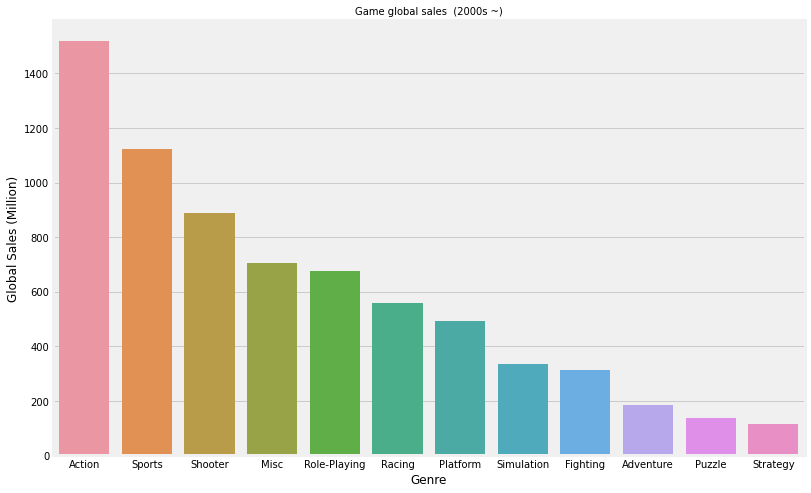

In [ ]:
subset = df[df['Year']>=2000].groupby('Genre').sum().sort_values(by='Total_Sales', ascending=False)
genre_order =  subset.index.to_list()
subset = subset.reset_index()

plt.figure(figsize = (12,8))
ax = plt.gca()
sns.barplot(x="Genre", y="Total_Sales", order = genre_order, data=subset)
ax.set_ylabel("Global Sales (Million)")
plt.title('Game global sales  (2000s ~)', fontsize = 10)
plt.show()

In [ ]:
df['Platform'].value_counts()

In [ ]:
df["Platform_Groups"] = np.where(df.Platform == "PC", "PC", \
                                 np.where((df.Platform == "3DS") | (df.Platform == "DS") | (df.Platform == "GB") | \
                                          (df.Platform == "GBA") | (df.Platform == "GG") | (df.Platform == "PSP") |  \
                                          (df.Platform == "PSV") | (df.Platform == "WS"), "Portable", "Console"))

df['Platform_Groups'].head()

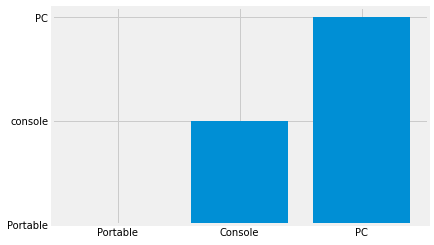

In [ ]:
x = np.arange(3)
y = ['Portable', 'Console', 'PC']
values = ["Portable", "console", "PC"]

plt.bar(x, values)
plt.xticks(x, years)

plt.show()

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

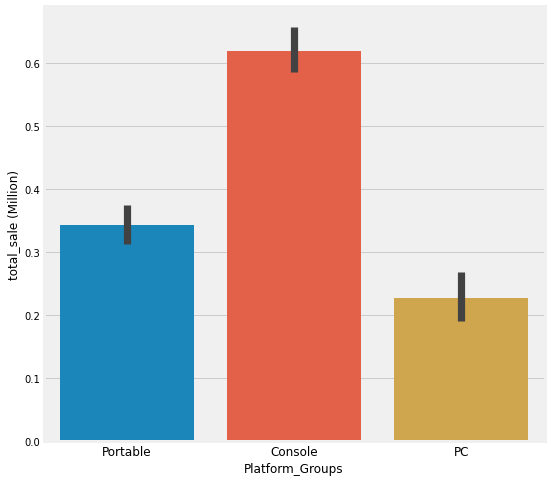

In [ ]:
f, ax = plt.subplots(1,1, figsize=(8, 8))
sns.barplot(x = 'Platform_Groups', y='총판매', data= df[df['Year']>=2000])
ax.set_ylabel('total_sale (Million)')
plt.xticks(fontsize=12)

In [ ]:
#버리는 코드 모음
df.rename(columns={'NA_Sales':'미국 판매율'}, inplace= True)
df.rename(columns={'EU_Sales':'유럽 판매율'}, inplace= True)
df.rename(columns={'JP_Sales':'일본 판매율'}, inplace= True)
df.rename(columns={'Other_Sales':'다른지역 판매율'}, inplace= True)


In [ ]:
df.dtypes


Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

In [ ]:
# 판매량의 K와 M 문자열 처리
df['NA_Sales'] = df['NA_Sales'].replace({'K': '*0.001', 'M': ""}, regex=True).map(pd.eval)
df['EU_Sales'] = df['EU_Sales'].replace({'K': '*0.001', 'M': ""}, regex=True).map(pd.eval)
df['JP_Sales'] = df['JP_Sales'].replace({'K': '*0.001', 'M': ""}, regex=True).map(pd.eval)
df['Other_Sales'] = pd.to_numeric(df['Other_Sales'].replace({'K': '*0.001', 'M': ""}, regex=True).map(pd.eval))

In [ ]:
# 전세계 판매량을 반영하기 위해, 새로운 feature 생성
df["Total_Sales"] = df.NA_Sales + df.EU_Sales + df.JP_Sales + df.Other_Sales

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  object 
 6   EU_Sales     16241 non-null  object 
 7   JP_Sales     16241 non-null  object 
 8   Other_Sales  16241 non-null  object 
 9   Total_Sales  16241 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
df['Platform'].value_counts()

DS      2127
PS2     2121
PS3     1299
Wii     1284
X360    1231
PSP     1193
PS      1185
PC       935
XB       799
GBA      784
GC       541
3DS      498
PSV      409
PS4      335
N64      313
SNES     239
XOne     212
SAT      173
WiiU     143
2600     115
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [ ]:
df["Platform_Groups"] = np.where(df.Platform == "PC", "PC", 
                                 np.where((df.Platform == "3DS") | (df.Platform == "DS") | (df.Platform == "GB") | 
                                          (df.Platform == "GBA") | (df.Platform == "GG") | (df.Platform == "PSP") |  
                                          (df.Platform == "PSV") | (df.Platform == "WS"), "Portable", "Console"))

df['Platform_Groups'].head()

0    Portable
1     Console
2    Portable
3    Portable
4     Console
Name: Platform_Groups, dtype: object

In [ ]:
# 지역에 따라서 선호하는 게임 장르가 다를까

NA = df.groupby(['Genre'])['NA_Sales'].sum()
EU = df.groupby(['Genre'])['EU_Sales'].sum()
JP = df.groupby(['Genre'])['JP_Sales'].sum()
Other = df.groupby(['Genre'])['Other_Sales'].sum()
locate_Genre = pd.DataFrame()
locate_Genre = locate_Genre.append(NA)
locate_Genre = locate_Genre.append(EU)
locate_Genre = locate_Genre.append(JP)
locate_Genre = locate_Genre.append(Other)
locate_Genre = locate_Genre.T

locate_Genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Action,0.040.170.070.040.140.190.11060K0.130.180.080....,0000.030.160.20.0100.080.0200.0400.010.060.030...,000.1100000.050.160000000000000.080.02000.0400...,00.010.010.010.060.050.0100.030.020.010.010.01...
Adventure,000.330.080.050.180000.19000.170.0100000.120.3...,000.050.140.040000.020.41000.060.0400.03000.05...,0.020.040.250000.120.02000.020.02000.0200.030....,000.040.050.020.010000.220000.0100000.020.0400...
Fighting,0.4800.131.98000.190.010.0700.010.020.060000.2...,0.5300.030.550K00.1300.010.050.01000000.060.02...,0.010.37000.010.4600000000.210.040.06000.010.0...,0.23000.3200.030.0200.0100000.010.0300.010.080...
Misc,0.040.0500.050.2500.040.050.210.04000.4300.080...,00000.0700.010.0200.010.010000.02003.150.050.0...,000.01000.03000.02000.0600.0400.020.05000.1600...,00000.030000.020000.0300001.0700.010.010.020.0...
Platform,0.120.570.0200.2900.5200.350.190.220.170.0200....,0.090.450.0100.2200.0600.240.050.1500000000.01...,0000.0800.070.410.51000K000.1700.150.020.14000...,0.040.15000.0800.0500.040.010.030.0100000.0100...
Puzzle,0.020.180.10.040.100.040.180.280.260.07000.040...,000000.010.010.120.0100000.010.085.36000.2100....,00.850000000.030.3100.570.62005.321.07000.1600...,000.0100.01000.020.020.020.010000.041.180.0700...
Racing,480K0.030.140.260.140000.040.130.350K0.031.230...,0.33M0.020.10.010.090.0400.040.030.020.430.020...,0K000000.01000000000000.0300000.0700000.020.01...,0.0600.0200.020.0100.0100.010.07000.340.010.01...
Role-Playing,000.020.30.130000.04000.50.94000.2000.01000.03...,0.02000.20.1000.030000.630.35000.140000.0300.0...,00.020.030.30.040.891.17000.030.04001.250.154....,0000.060.020000000.10.02000.020000.010.01M0.01...
Shooter,00.120.510.250.010.080.070.070.360.045.9100.02...,0.230.010.330.1700.070.020.020.210.032.381.120...,00.020.010.01000K00.0100.1300000000.010.050000...,0.060.010.080.050M0.010.0200.060.010.90.0300.0...
Simulation,0.020.140.060.340.070.020.160.630.020.030.0600...,0.010.050.040.260.050.010.020.050.240.01000000...,00000.1300.53000.0100.0600.280000.03000.75000....,000.010.10.0200.010.060.05000M10K00.010.010.03...


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
locate_heatmap = sns.heatmap(locate_Genre, annot=True, fmt='.2f')
plt.show()

ValueError: ignored

<Figure size 720x720 with 0 Axes>

TypeError: ignored

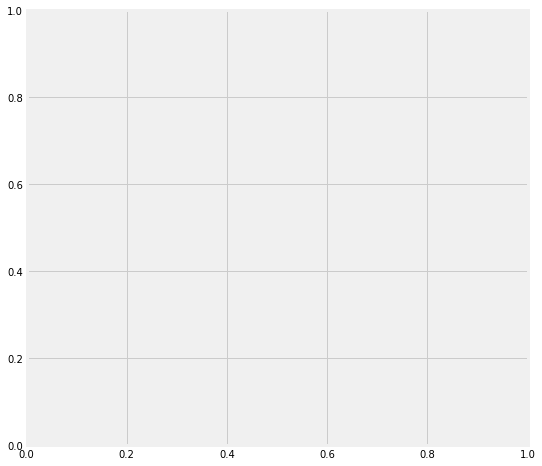

In [ ]:
# Platform에 따른 전세계 판매량 비교
f, ax = plt.subplots(1,1, figsize=(8, 8))
sns.barplot(x = 'Platform_Groups', y='Total_Sales', data= df[df['Year']>=2000])
ax.set_ylabel('Global Sales (Million)')
plt.xticks(fontsize=12)

Text(0.5, 0, ' ')

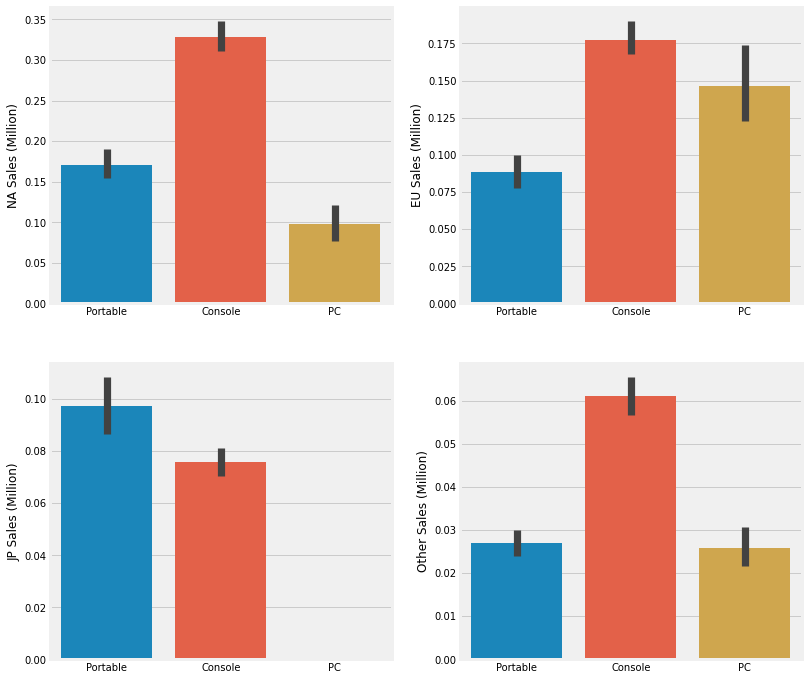

In [ ]:
# Platform에 따른 각 지역 판매량 비교
f, ax = plt.subplots(2,2, figsize=(12, 12))
sns.barplot(x = 'Platform_Groups', y='NA_Sales', data=df, ax=ax[0,0])
ax[0,0].set_ylabel('NA Sales (Million)')
ax[0,0].set_xlabel(' ')

sns.barplot(x = 'Platform_Groups', y='EU_Sales', data=df, ax=ax[0,1])
ax[0,1].set_ylabel('EU Sales (Million)')
ax[0,1].set_xlabel(' ')

sns.barplot(x = 'Platform_Groups', y='JP_Sales', data=df, ax=ax[1,0])
ax[1,0].set_ylabel('JP Sales (Million)')
ax[1,0].set_xlabel(' ')

sns.barplot(x = 'Platform_Groups', y='Other_Sales', data=df, ax=ax[1,1])
ax[1,1].set_ylabel('Other Sales (Million)')
ax[1,1].set_xlabel(' ')

In [ ]:
df["Multiplatform"] = df.duplicated(["Name"], keep=False) # 중복된 모든 행에 True 표시
df["Multiplatform"] = df["Multiplatform"].map({True: 1, False:0})
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Platform_Groups,Multiplatform
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04,Portable,1
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,Console,0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02,Portable,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,Portable,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,Console,1
...,...,...,...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20,Console,1
16237,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01,Portable,0
16238,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79,Console,1
16239,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38,Portable,1


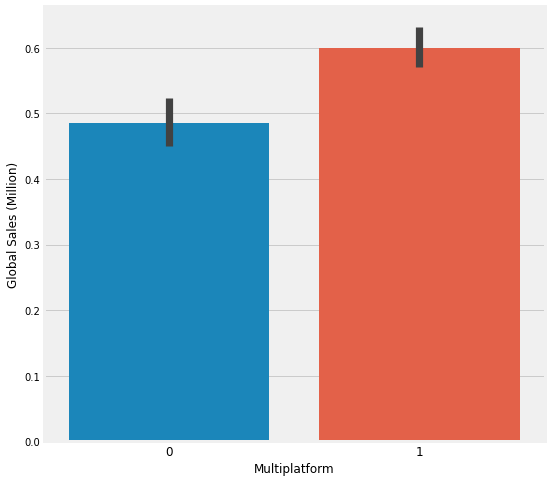

In [ ]:
# 멀티플랫폼에 따른 총 판매량 비교
f, ax = plt.subplots(1,1, figsize=(8, 8))
sns.barplot(x = 'Multiplatform', y='Total_Sales', data=df)
ax.set_ylabel('Global Sales (Million)')
plt.xticks(fontsize=12)
plt.show()

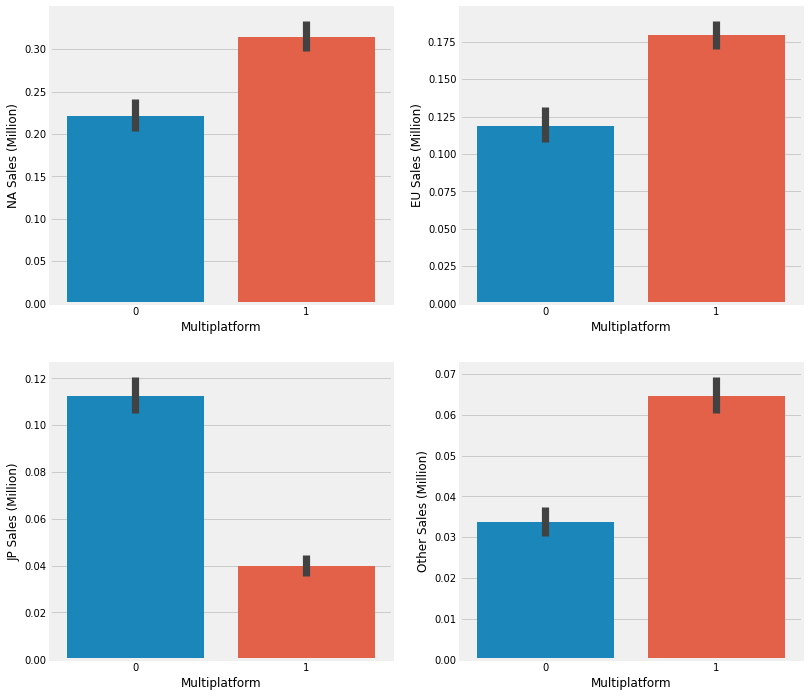

In [ ]:
# 멀티플랫폼에 따른 각 지역 판매량 비교
f, ax = plt.subplots(2,2, figsize=(12, 12))
sns.barplot(x = 'Multiplatform', y='NA_Sales', data=df, ax=ax[0,0])
ax[0,0].set_ylabel('NA Sales (Million)')
ax[0,0].set_xlabel('Multiplatform')

sns.barplot(x = 'Multiplatform', y='EU_Sales', data=df, ax=ax[0,1])
ax[0,1].set_ylabel('EU Sales (Million)')
ax[0,1].set_xlabel('Multiplatform')

sns.barplot(x = 'Multiplatform', y='JP_Sales', data=df, ax=ax[1,0])
ax[1,0].set_ylabel('JP Sales (Million)')
ax[1,0].set_xlabel('Multiplatform')

sns.barplot(x = 'Multiplatform', y='Other_Sales', data=df, ax=ax[1,1])
ax[1,1].set_ylabel('Other Sales (Million)')
ax[1,1].set_xlabel('Multiplatform')


plt.show()

In [ ]:
df['Year'].value_counts()

2009.0    1418
2008.0    1413
2010.0    1246
2007.0    1192
2011.0    1123
          ... 
13.0         2
12.0         2
86.0         1
2020.0       1
94.0         1
Name: Year, Length: 62, dtype: int64

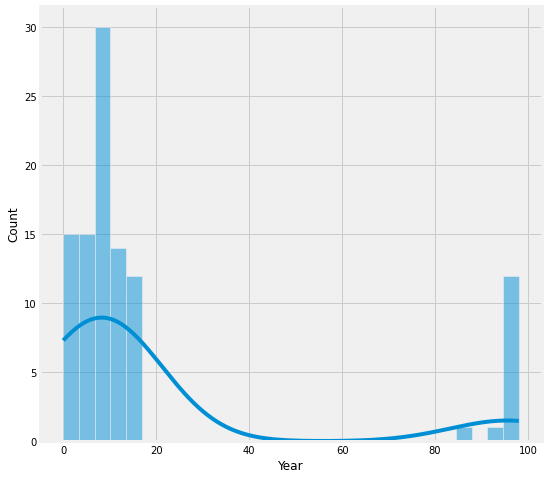

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(8,8))
sns.histplot(x = df[(df['Year'] <= 100)]['Year'], kde=True)
plt.show()

In [ ]:
# 1. 지역별 게임장르
# Sale 데이터에 (M,K) 제거해야함
drop_values = ['K','M']
df = df[~df['NA_Sales'].str.contains('|'.join(drop_values))]
df = df[~df['EU_Sales'].str.contains('|'.join(drop_values))]
df = df[~df['JP_Sales'].str.contains('|'.join(drop_values))]
df = df[~df['Other_Sales'].str.contains('|'.join(drop_values))]

df["Total_Sales"] = df.NA_Sales + df.EU_Sales + df.JP_Sales + df.Other_Sales
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15476 entries, 0 to 16240
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             15476 non-null  object 
 1   Platform         15476 non-null  object 
 2   Year             15476 non-null  float64
 3   Genre            15476 non-null  object 
 4   Publisher        15476 non-null  object 
 5   NA_Sales         15476 non-null  object 
 6   EU_Sales         15476 non-null  object 
 7   JP_Sales         15476 non-null  object 
 8   Other_Sales      15476 non-null  object 
 9   Total_Sales      15476 non-null  object 
 10  Platform_Groups  15476 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.4+ MB


In [ ]:
#플랫폼의 종류 갯수
df['Platform'].value_counts()

df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df

# 전 대륙 선호하는 게임 장르
df_genre = df.groupby(by=['Genre'])['Total_Sales'].sum() 
df_genre = df_genre.reset_index()

# 북미 선호하는 게임 장르
df_na = df.groupby(by=['Genre'])['NA_Sales'].sum() 
df_na = df_na.reset_index()

 # 유럽 선호하는 게임 장르
df_eu = df.groupby(by=['Genre'])['EU_Sales'].sum()
df_eu = df_eu.reset_index()

# 일본 선호하는 게임 장르
df_jp = df.groupby(by=['Genre'])['JP_Sales'].sum() 
df_jp = df_jp.reset_index()

# 기타지역 선호하는 게임 장르
df_genre_ot = df.groupby(by=['Genre'])['Other_Sales'].sum() 
df_genre_ot = df_ot.reset_index()

df_genre = df_genre.combine_first(df_genre_na).combine_first(df_genre_eu).combine_first(df_genre_jp).combine_first(df_genre_ot)
df_genre = df_genre.set_index("Genre")

sns.set(style='darkgrid')
plt.figure(figsize=(15, 10))
plt.title("Preferred Game Genre by Continent", fontsize=30)
plt.xlabel("Genre of game", fontsize=20)
plt.ylabel("Total sales volume", fontsize=20)

sns.lineplot(data=df_genre, markers=True);

NameError: ignored








*  지역에 따라서 선호하는 게임 장르가 다를까?  
*  연도별 게임의 트렌드가 있을까?
*  출고량의 높은 게임에 대한 분석 및 시각화 프로세스는?









In [ ]:
index_correct_year = list(df[(df['Year'] < 100)].index)

for i in index_correct_year:
		if df['Year'].iloc[i] <= 20 :
				df['Year'].iloc[i] = df['Year'].iloc[i] + 2000

		elif df['Year'].iloc[i] >= 80 :
				df['Year'].iloc[i] = df['Year'].iloc[i] + 1900

df['Year'] = df['Year'].astype(int)

for col in df.columns:
    msg = 'column {:<10}\t Percent of NaN value : {:.2f}%'.format(col, 100*(df[col].isnull().sum() / len(df[col])))
    print(msg)
# 판매량의 K와 M 문자열 처리
df['NA_Sales'] = df['NA_Sales'].replace({'K': '*0.001', 'M': ""}, regex=True).map(pd.eval)
df['EU_Sales'] = df['EU_Sales'].replace({'K': '*0.001', 'M': ""}, regex=True).map(pd.eval)
df['JP_Sales'] = df['JP_Sales'].replace({'K': '*0.001', 'M': ""}, regex=True).map(pd.eval)
df['Other_Sales'] = pd.to_numeric(df['Other_Sales'].replace({'K': '*0.001', 'M': ""}, regex=True).map(pd.eval))

# 전세계 판매량을 반영하기 위해, 새로운 feature 생성
df["Total_Sales"] = df.NA_Sales + df.EU_Sales + df.JP_Sales + df.Other_Sales
df.info()

지역에 따라서 선호하는 게임 장르가 다를까?